<a href="https://colab.research.google.com/github/Aadithyan2003/CODSOFT/blob/main/SMS_SPAM_DETECTION_USING_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
dataset=pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
dataset.shape

(5572, 5)

As we do not need some columns because they have NaN(null) values so we will remove them

In [7]:
dataset=dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
dataset = dataset.rename(columns={'v1':'type','v2':'message'})

In [11]:
dataset.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Fitering the spam and ham messages

In [17]:
df=pd.DataFrame(dataset)
spamfiltered = df.loc[df['type']=='spam']
print(spamfiltered,'\n')
hamfiltered = df.loc[df['type']=='ham']
print(hamfiltered)

      type                                            message
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
11    spam  SIX chances to win CASH! From 100 to 20,000 po...
...    ...                                                ...
5537  spam  Want explicit SEX in 30 secs? Ring 02073162414...
5540  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547  spam  Had your contract mobile 11 Mnths? Latest Moto...
5566  spam  REMINDER FROM O2: To get 2.50 pounds free call...
5567  spam  This is the 2nd time we have tried 2 contact u...

[747 rows x 2 columns] 

     type                                            message
0     ham  Go until jurong point, crazy.. Available only ...
1     ham                      Ok lar... Joking wif u oni...
3     ham  U dun say so early hor... U c alread

Data Visualization

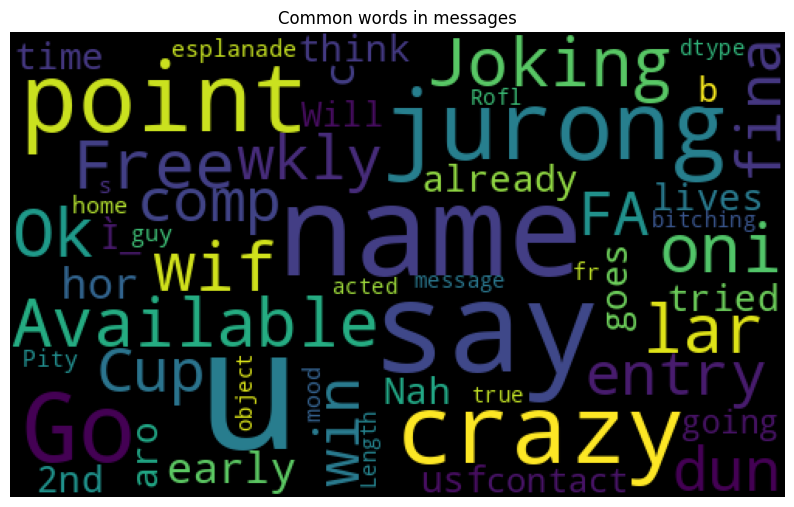

In [21]:
#printing the most commonly used words
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=110).generate(str(dataset['message']))
plt.rcParams['figure.figsize']=(10,10)
plt.title("Common words in messages")
plt.axis("off")
plt.imshow(wordcloud)

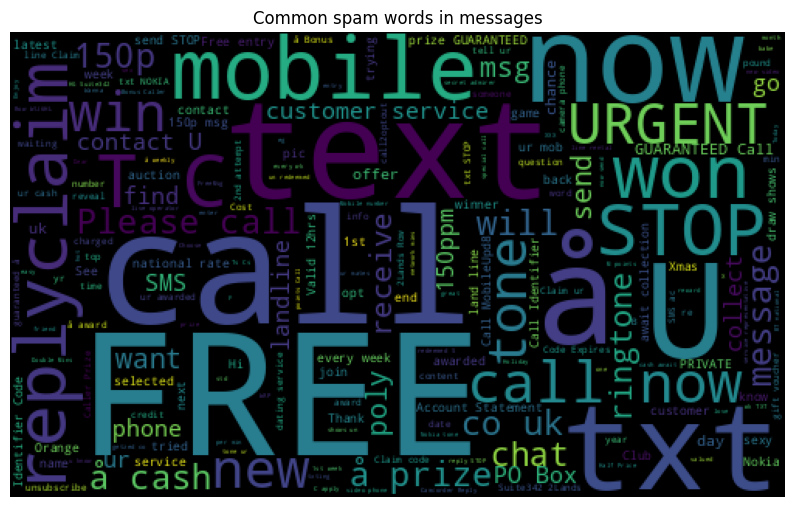

In [24]:
#common spam words
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=110).generate(' '.join(spamfiltered['message']))
plt.rcParams['figure.figsize']=(10,10)
plt.title("Common spam words in messages")
plt.axis("off")
plt.imshow(wordcloud)

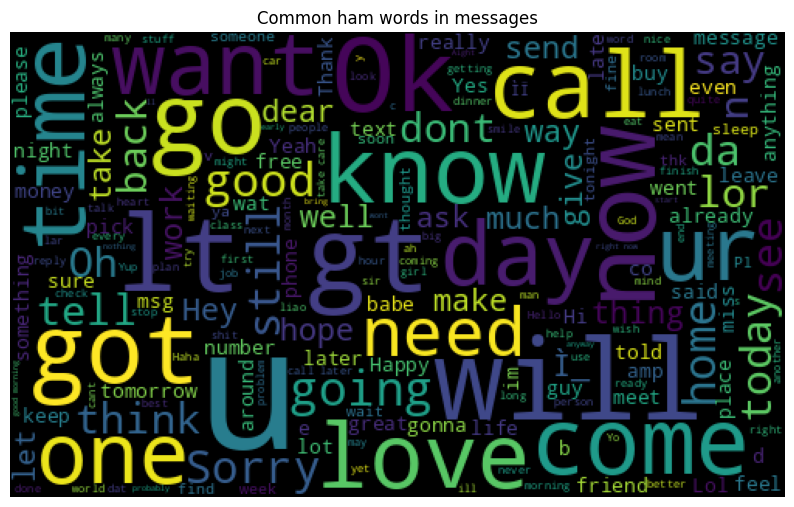

In [25]:
#common ham words
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=110).generate(' '.join(hamfiltered['message']))
plt.rcParams['figure.figsize']=(10,10)
plt.title("Common ham words in messages")
plt.axis("off")
plt.imshow(wordcloud)

In [50]:
del df['type']

In [60]:
df.head()

,message,Status
0,"Go until jurong point, crazy.. Available only ...",1.0
1,Ok lar... Joking wif u oni...,1.0
2,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,U dun say so early hor... U c already then say...,1.0
4,"Nah I don't think he goes to usf, he lives aro...",1.0


In [61]:
df_x=df['message']
df_y=df['Status']

Using TF-IDF Vectorizer for feature extraction

In [35]:
tf=TfidfVectorizer(min_df=1,stop_words='english')

In [62]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [63]:
x_traintf=tf.fit_transform(["hello this is python here","What's up, how are you doing?","this is wonderful"])

In [40]:
x_traintf.toarray()

array([[0.        , 0.70710678, 0.70710678, 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [76]:
# Convert the csr_matrix back to a list of strings
x_train_text = [' '.join([str(x) for x in row.toarray()[0]]) for row in x_train]
x_traintf2 = tf.fit_transform(x_train_text)

In [77]:
x_traintf2.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
tf.get_feature_names_out()

array(['doing', 'hello', 'python', 'wonderful'], dtype=object)

In [43]:
tf1=TfidfVectorizer(min_df=1,stop_words='english')

In [44]:
x_traintf=tf1.fit_transform(x_train)
a=x_traintf.toarray()
print(a)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [46]:
tf1.inverse_transform(a[0].reshape(1,-1))

[array(['09099725823', '2nite', 'borin', 'callså', 'chat', 'claire', 'cum',
        'havin', 'hope', 'luv', 'minmoremobsemspobox45po139wa', 'time',
        'wanna', 'xx'], dtype='<U34')]

In [47]:
x_train.iloc[0]

'CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Callså£1/minmoremobsEMSPOBox45PO139WA'

In [90]:
x_testtf=tf.transform(x_test)

USING ML ALGORITHM MULTINOMIAL NAIVE BAYES

In [48]:
mnb=MultinomialNB()

In [53]:
df.head()

,message,Status
0,"Go until jurong point, crazy.. Available only ...",1.0
1,Ok lar... Joking wif u oni...,1.0
2,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,U dun say so early hor... U c already then say...,1.0
4,"Nah I don't think he goes to usf, he lives aro...",1.0


In [64]:
y_train=y_train.astype('int')

In [78]:
mnb.fit(x_traintf2,y_train)

MultinomialNB()

In [91]:
pred=mnb.predict(x_testtf)

In [89]:
print(pred)

[1 1 1 ... 1 1 1]


In [102]:
actual=np.array(y_test)

In [103]:
actual

array([1., 1., 0., ..., 1., 0., 0.])

In [104]:
c=0
for i in range(len(pred)):
  if pred[i]==actual[i]:
    c+=1

In [105]:
c

941

In [106]:
len(pred)

1115

In [107]:
accuracy=941/1115
print(accuracy)

0.8439461883408071
